# Erzeugung von Zufallszahlen
## 1. Klausurwürfel von Professorin Müller und Professor Schmidt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="darkgrid")

In [2]:
def throw_dice(dice, n=1):
    dice_values = list(dice.keys())
    probabilities = list(dice.values())

    dice_throws = []

    for i in np.random.uniform(0, 1, n):
        dice_throws.append(dice_values[np.argmax(np.cumsum(probabilities) >= i)])

    return dice_throws

In [3]:
schmidt_dice = {
    1: 2/6,
    2: 3/6,
    3: 1/6,
    4: 0,
    5: 0
}

mueller_dice = {
    1: 0,
    2: 1/6,
    3: 2/6,
    4: 2/6,
    5: 1/6
}

number_of_throws = 100000

mueller_simulation = np.sort(throw_dice(dice=mueller_dice, n=number_of_throws))
schmidt_simulation = np.sort(throw_dice(dice=schmidt_dice, n=number_of_throws))

### Professorin Schmidts Würfel

In [4]:
schmidt_df = pd.DataFrame(schmidt_simulation)
schmidt_df.describe()

,0
count,100000.000000
mean,1.833600
std,0.685956
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000


In [5]:
schmidt_df.value_counts().sort_index() / number_of_throws


1    0.33231
2    0.50178
3    0.16591
dtype: float64

### Professorin Müllers Würfel

In [6]:
mueller_df = pd.DataFrame(mueller_simulation)
mueller_df.describe()

,0
count,100000.000000
mean,3.500370
std,0.956174
min,2.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


In [7]:
mueller_df.value_counts().sort_index() / number_of_throws

2    0.16537
3    0.33565
4    0.33222
5    0.16676
dtype: float64

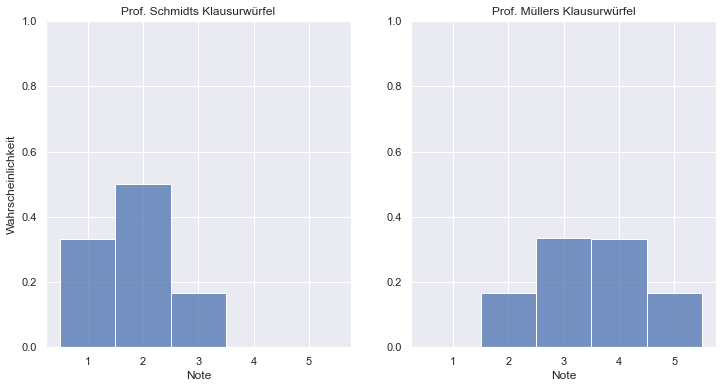

In [8]:
f = plt.figure(figsize=(12, 6))
gs = f.add_gridspec(1, 2)

# Schmidt simulation
ax = f.add_subplot(gs[0, 0])
hist = sns.histplot(x=schmidt_simulation, stat='probability', ax=ax, discrete=True)
hist.set(ylabel="Wahrscheinlichkeit", xlabel="Note", title="Prof. Schmidts Klausurwürfel",
         xlim=(0.25, max(schmidt_dice.keys())+0.75), ylim=(0,1))

# Mueller simulation
ax = f.add_subplot(gs[0, 1])
hist = sns.histplot(x=mueller_simulation, stat='probability', ax=ax, discrete=True)
hist.set(ylabel="", xlabel="Note", title="Prof. Müllers Klausurwürfel",
         xlim=(0.25, max(mueller_dice.keys())+0.75), ylim=(0,1))

plt.show()

## 2. Eigener Klausurwürfel

In [9]:
def throw_own_dice(n=1):
    marks = [
        1.0, 1.3, 1.5, 1.7,
        2.0, 2.3, 2.5, 2.7,
        3.0, 3.3, 3.5, 3.7,
        4.0, 4.3, 4.5, 4.7,
        5.0,
    ]

    dice_throws = []
    for i in range(n):
        while True:
            try:
                random_index = np.random.poisson(4)
                dice_throws.append(marks[random_index])
                break
            except IndexError:
                pass

    return dice_throws

In [10]:
own_simulation = np.sort(throw_own_dice(number_of_throws))

In [11]:
own_df = pd.DataFrame(own_simulation)
own_df.describe()

,0
count,100000.000000
mean,1.999315
std,0.500393
min,1.000000
25%,1.700000
50%,2.000000
75%,2.300000
max,4.500000


In [12]:
own_df.value_counts().sort_index() / number_of_throws

1.0    0.01789
1.3    0.07318
1.5    0.14490
1.7    0.19846
2.0    0.19424
2.3    0.15753
2.5    0.10354
2.7    0.05934
3.0    0.02979
3.3    0.01306
3.5    0.00511
3.7    0.00202
4.0    0.00065
4.3    0.00020
4.5    0.00009
dtype: float64

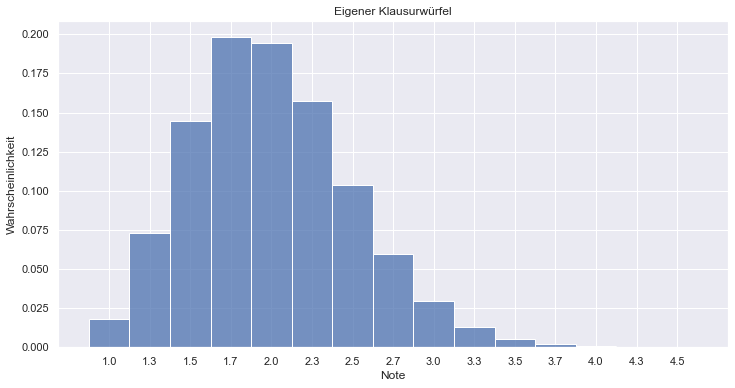

In [13]:
f = plt.figure(figsize=(12, 6))

own_simulation = [str(mark) for mark in own_simulation]

hist = sns.histplot(x=own_simulation, stat='probability')
hist.set(ylabel="Wahrscheinlichkeit", xlabel="Note", title="Eigener Klausurwürfel")

plt.show()